CNN LSTM

In [1]:
import pandas as pd
# Load the dataset
df = pd.read_csv(r'C:\Users\arell\Documents\1_ALF\data\source.csv', low_memory=False)
# Calculate the length of each URL
df['url_length'] = df['url'].apply(len)

# Find the maximum URL length
max_url_length = df['url_length'].max()

print(f"The maximum URL length in the dataset is: {max_url_length}")


The maximum URL length in the dataset is: 2175


c:\Users\arell\.pyenv\pyenv-win\versions\3.11.9\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 794s 563ms/step - accuracy: 0.4984 - loss: 0.6937 - val_accuracy: 0.4994 - val_loss: 0.6932
Epoch 2/10
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 789s 563ms/step - accuracy: 0.5000 - loss: 0.6933 - val_accuracy: 0.5006 - val_loss: 0.6931
Epoch 3/10
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 754s 539ms/step - accuracy: 0.4996 - loss: 0.6932 - val_accuracy: 0.4994 - val_loss: 0.6932
Epoch 4/10
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 538s 384ms/step - accuracy: 0.5029 - loss: 0.6932 - val_accuracy: 0.5006 - val_loss: 0.6932
Epoch 5/10
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 477s 341ms/step - accuracy: 0.4993 - loss: 0.6932 - val_accuracy: 0.5006 - val_loss: 0.6931
Epoch 6/10
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 421s 301ms/step - accuracy: 0.4990 - loss: 0.6932 - val_accuracy: 0.4994 - val_loss: 0.6932
Epoch 7/10
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 489s 350ms/step - accuracy: 0.5024 - loss: 0.6932 - val_accuracy: 0.4994 - val_loss: 0.6931
Epoch 8/10
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 497s 355ms/step - ac

c:\Users\arell\.pyenv\pyenv-win\versions\3.11.9\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\arell\.pyenv\pyenv-win\versions\3.11.9\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\arell\.pyenv\pyenv-win\versions\3.11.9\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.cap

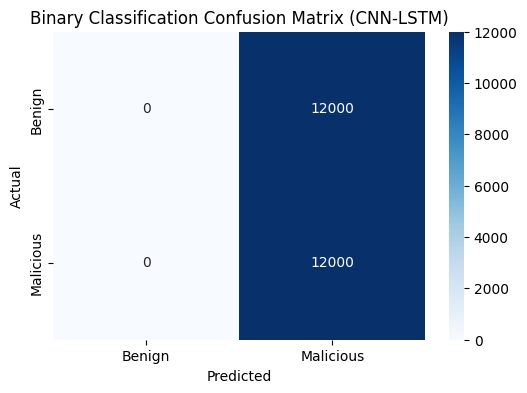

KeyError: 'url_type'

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, LSTM, Dense, Dropout
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.under_sampling import RandomUnderSampler

# Load and preprocess dataset
df = pd.read_csv(r'C:\Users\arell\Documents\1_ALF\data\source.csv', low_memory=False)

# Binary label encoding
df['binary_label'] = df['type'].apply(lambda x: 0 if x == 'benign' else 1)

# Character-level tokenization for URLs
tokenizer = Tokenizer(char_level=True)
tokenizer.fit_on_texts(df['url'])
sequences = tokenizer.texts_to_sequences(df['url'])
vocab_size = len(tokenizer.word_index) + 1
max_length = 2175
X_padded = pad_sequences(sequences, maxlen=max_length, padding='post')
y = df['binary_label'].values

# Apply undersampling for binary classification
import numpy as np
under_sampler = RandomUnderSampler(sampling_strategy={label: 40000 for label in np.unique(y)}, random_state=42)
X_padded, y = under_sampler.fit_resample(X_padded, y)

# Split data for binary classification
X_train, X_test, y_train, y_test = train_test_split(X_padded, y, test_size=0.3, random_state=42, stratify=y)

# Build and compile CNN-LSTM model
embedding_dim = 50
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length),
    Conv1D(filters=128, kernel_size=5, activation='relu'),
    MaxPooling1D(pool_size=2),
    LSTM(64),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

# Train model for binary classification
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate binary classification performance
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print("Binary Classification Report:")
print(classification_report(y_test, y_pred))
print("Binary Test Accuracy:", accuracy_score(y_test, y_pred))

# Binary Confusion Matrix
binary_confusion_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(binary_confusion_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Benign", "Malicious"], yticklabels=["Benign", "Malicious"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Binary Classification Confusion Matrix (CNN-LSTM)")
plt.show()

# Multiclass Classification for Malicious URLs
malicious_df = df[df['binary_label'] == 1].copy()
y_multi = LabelEncoder().fit_transform(malicious_df['url_type'])

# Tokenize and pad malicious URLs
malicious_sequences = tokenizer.texts_to_sequences(malicious_df['url'])
X_padded_multi = pad_sequences(malicious_sequences, maxlen=max_length, padding='post')

# Train-test split for multiclass classification
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(
    X_padded_multi, y_multi, test_size=0.4, random_state=42, stratify=y_multi
)

# Modify and recompile model for multiclass classification
model.pop()  # Remove the last binary layer
model.add(Dense(len(np.unique(y_multi)), activation='softmax'))  # Add softmax for multiclass
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train model for multiclass classification
history = model.fit(X_train_multi, y_train_multi, epochs=20, batch_size=256, validation_split=0.3)

# Evaluate multiclass classification performance
y_pred_multi = np.argmax(model.predict(X_test_multi), axis=1)
print("Multiclass Classification Report:")
print(classification_report(y_test_multi, y_pred_multi))
print("Multiclass Test Accuracy:", accuracy_score(y_test_multi, y_pred_multi))

# Multiclass Confusion Matrix
multiclass_confusion_matrix = confusion_matrix(y_test_multi, y_pred_multi)
plt.figure(figsize=(10, 8))
sns.heatmap(multiclass_confusion_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Multiclass Classification Confusion Matrix (CNN-LSTM)")
plt.show()


Class distribution after undersampling: Counter({np.int64(0): 12000, np.int64(1): 4000})


c:\Users\arell\.pyenv\pyenv-win\versions\3.11.9\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
280/280 ━━━━━━━━━━━━━━━━━━━━ 64s 220ms/step - accuracy: 0.7340 - loss: 0.8530 - val_accuracy: 0.7536 - val_loss: 0.6615
Epoch 2/5
280/280 ━━━━━━━━━━━━━━━━━━━━ 63s 224ms/step - accuracy: 0.7362 - loss: 0.6617 - val_accuracy: 0.7536 - val_loss: 0.5927
Epoch 3/5
280/280 ━━━━━━━━━━━━━━━━━━━━ 64s 229ms/step - accuracy: 0.7464 - loss: 0.5990 - val_accuracy: 0.7536 - val_loss: 0.5735
Epoch 4/5
280/280 ━━━━━━━━━━━━━━━━━━━━ 69s 245ms/step - accuracy: 0.7493 - loss: 0.5804 - val_accuracy: 0.7536 - val_loss: 0.5670
Epoch 5/5
280/280 ━━━━━━━━━━━━━━━━━━━━ 69s 246ms/step - accuracy: 0.7637 - loss: 0.5575 - val_accuracy: 0.7536 - val_loss: 0.5652
150/150 ━━━━━━━━━━━━━━━━━━━━ 10s 65ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.75      1.00      0.86      3600
           1       0.00      0.00      0.00      1200

    accuracy                           0.75      4800
   macro avg       0.38      0.50      0.43      4800
weighted avg

c:\Users\arell\.pyenv\pyenv-win\versions\3.11.9\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\arell\.pyenv\pyenv-win\versions\3.11.9\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\arell\.pyenv\pyenv-win\versions\3.11.9\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.cap

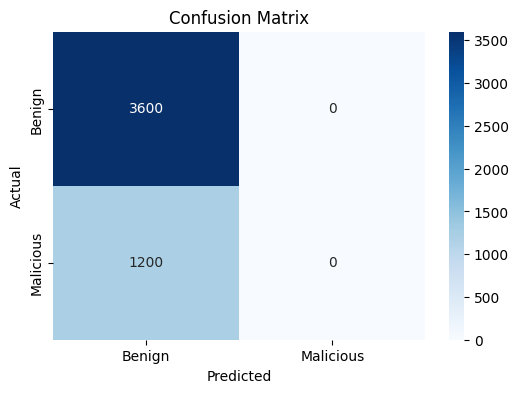

Model saved as binary_classification_model.pkl


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, LSTM, Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.under_sampling import RandomUnderSampler
import joblib

# Load and preprocess dataset
df = pd.read_csv(r'C:\Users\arell\Documents\1_ALF\data\source.csv', low_memory=False)

# Binary label encoding
df['binary_label'] = df['type'].apply(lambda x: 0 if x == 'benign' else 1)

# Character-level tokenization for URLs
tokenizer = Tokenizer(char_level=True)
tokenizer.fit_on_texts(df['url'])
sequences = tokenizer.texts_to_sequences(df['url'])
vocab_size = len(tokenizer.word_index) + 1
max_length = 2175
X_padded = pad_sequences(sequences, maxlen=max_length, padding='post')
y = df['binary_label'].values

## LIMIT DATA TO 24k
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler

# Limit benign to 12,000 and malicious to 4,000 each
sampling_strategy = {0: 12000, 1: 4000}

# Apply undersampling
under_sampler = RandomUnderSampler(sampling_strategy=sampling_strategy, random_state=42)
X_padded, y = under_sampler.fit_resample(X_padded, y)

# Verify the new class distribution
print(f"Class distribution after undersampling: {Counter(y)}")

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_padded, y, test_size=0.3, random_state=42, stratify=y)

# Build model
embedding_dim = 32  # Reduced
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length),
    Conv1D(filters=64, kernel_size=5, activation='relu'),  # Reduced filters
    MaxPooling1D(pool_size=2),
    LSTM(32),  # Reduced LSTM units
    Dense(32, activation='relu', kernel_regularizer=l2(0.01)),  # Added L2 regularization
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

# Compile model
optimizer = Adam(learning_rate=0.0005)  # Lower learning rate
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(
    X_train, y_train,
    epochs=5,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# Evaluate model
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Benign", "Malicious"], yticklabels=["Benign", "Malicious"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Save model as a .pkl file
joblib.dump(model, "binary_classification_model.pkl")
print("Model saved as binary_classification_model.pkl")


Epoch 1/5


c:\Users\arell\.pyenv\pyenv-win\versions\3.11.9\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


210/210 ━━━━━━━━━━━━━━━━━━━━ 70s 321ms/step - accuracy: 0.4999 - loss: 0.6935 - val_accuracy: 0.4908 - val_loss: 0.6933
Epoch 2/5
210/210 ━━━━━━━━━━━━━━━━━━━━ 68s 326ms/step - accuracy: 0.5047 - loss: 0.6932 - val_accuracy: 0.4908 - val_loss: 0.6932
Epoch 3/5
210/210 ━━━━━━━━━━━━━━━━━━━━ 73s 350ms/step - accuracy: 0.4917 - loss: 0.6934 - val_accuracy: 0.4908 - val_loss: 0.6933
Epoch 4/5
210/210 ━━━━━━━━━━━━━━━━━━━━ 61s 291ms/step - accuracy: 0.4958 - loss: 0.6933 - val_accuracy: 0.5092 - val_loss: 0.6931
Epoch 5/5
210/210 ━━━━━━━━━━━━━━━━━━━━ 67s 321ms/step - accuracy: 0.5049 - loss: 0.6932 - val_accuracy: 0.4908 - val_loss: 0.6932
225/225 ━━━━━━━━━━━━━━━━━━━━ 16s 72ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67      3600
           1       0.00      0.00      0.00      3600

    accuracy                           0.50      7200
   macro avg       0.25      0.50      0.33      7200
weighted avg       0.2

c:\Users\arell\.pyenv\pyenv-win\versions\3.11.9\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\arell\.pyenv\pyenv-win\versions\3.11.9\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\arell\.pyenv\pyenv-win\versions\3.11.9\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.cap

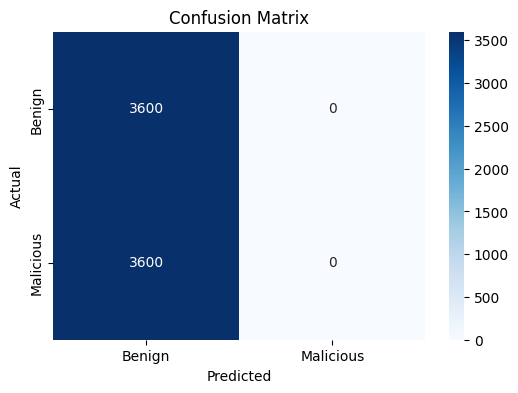

Model saved as binary_classification_model.pkl


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, LSTM, Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.under_sampling import RandomUnderSampler
import joblib

# Load and preprocess dataset
df = pd.read_csv(r'C:\Users\arell\Documents\1_ALF\data\source.csv', low_memory=False)

# Binary label encoding
df['binary_label'] = df['type'].apply(lambda x: 0 if x == 'benign' else 1)

# Character-level tokenization for URLs
tokenizer = Tokenizer(char_level=True)
tokenizer.fit_on_texts(df['url'])
sequences = tokenizer.texts_to_sequences(df['url'])
vocab_size = len(tokenizer.word_index) + 1
max_length = 2175
X_padded = pad_sequences(sequences, maxlen=max_length, padding='post')
y = df['binary_label'].values

## LIMIT DATA TO 24k
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, confusion_matrix

# Adjust undersampling strategy: 12,000 benign and 12,000 malicious
sampling_strategy = {0: 12000, 1: 12000}
under_sampler = RandomUnderSampler(sampling_strategy=sampling_strategy, random_state=42)
X_padded, y = under_sampler.fit_resample(X_padded, y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_padded, y, test_size=0.3, random_state=42, stratify=y)

# Compute class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights = dict(enumerate(class_weights))

# Build model
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length),
    Conv1D(filters=64, kernel_size=5, activation='relu'),  # Reduce Conv1D filters for less computational cost
    MaxPooling1D(pool_size=2),
    LSTM(32),  # Reduce LSTM units for efficiency
    Dense(32, activation='relu'),  # Reduce Dense units
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.2, class_weight=class_weights)

# Evaluate model
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Benign", "Malicious"], yticklabels=["Benign", "Malicious"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Save model as a .pkl file
joblib.dump(model, "binary_classification_model.pkl")
print("Model saved as binary_classification_model.pkl")


c:\Users\arell\.pyenv\pyenv-win\versions\3.11.9\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4951 - loss: 215.3565 - val_accuracy: 0.5089 - val_loss: 0.6932
Epoch 2/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5034 - loss: 5.9708 - val_accuracy: 0.5092 - val_loss: 0.6931
Epoch 3/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5007 - loss: 1.9567 - val_accuracy: 0.5092 - val_loss: 0.6930
Epoch 4/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5014 - loss: 1.2580 - val_accuracy: 0.5092 - val_loss: 0.6929
Epoch 5/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4970 - loss: 1.0632 - val_accuracy: 0.5092 - val_loss: 0.6930
Epoch 6/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4932 - loss: 0.9668 - val_accuracy: 0.5092 - val_loss: 0.6930
Epoch 7/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4961 - loss: 0.9009 - val_accuracy: 0.5092 - val_loss: 0.6928
Epoch 8/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5020 - loss: 0.7834 - val_accuracy: 

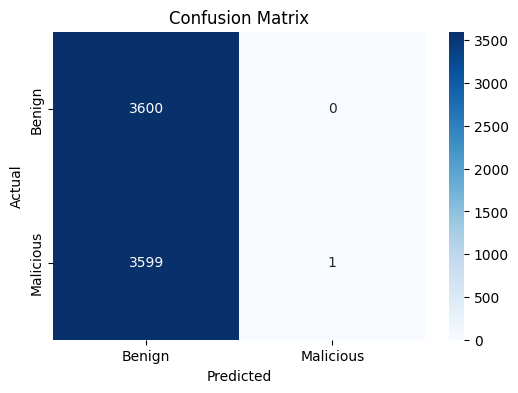

In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from imblearn.under_sampling import RandomUnderSampler
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv(r'C:\Users\arell\Documents\1_ALF\data\malicious_2021.csv', low_memory=False)

# Clean and encode the dataset
df_cleaned = df.copy()
df_cleaned['tld'] = df_cleaned['tld'].astype(str)
df_cleaned['url_type'] = df_cleaned['url_type'].astype(str)

# Remove NaNs and infinities from numeric columns only
numeric_features = [f for f in df_cleaned.columns if f not in ['tld', 'url_type']]
df_cleaned = df_cleaned[np.isfinite(df_cleaned[numeric_features]).all(axis=1)]

# Encode categorical columns
label_encoder_tld = LabelEncoder()
label_encoder_url_type = LabelEncoder()
df_cleaned['tld_encoded'] = label_encoder_tld.fit_transform(df_cleaned['tld'])
df_cleaned['url_type_encoded'] = label_encoder_url_type.fit_transform(df_cleaned['url_type'])

# Define features to use
selected_features = [
    'domain_token_count', 'path_token_count', 'avgdomaintokenlen',
    'longdomaintokenlen', 'ldl_domain', 'ldl_path', 'subDirLen',
    'pathurlRatio', 'argDomanRatio', 'domainUrlRatio', 'NumberofDotsinURL',
    'CharacterContinuityRate', 'host_DigitCount', 'host_letter_count',
    'Directory_LetterCount', 'Domain_LongestWordLength',
    'sub-Directory_LongestWordLength', 'URLQueries_variable',
    'delimeter_Domain', 'delimeter_Count', 'NumberRate_Domain',
    'SymbolCount_URL', 'SymbolCount_Domain', 'Entropy_Domain',
    'tld_encoded'
]

# Convert features to float32
X = df_cleaned[selected_features].astype(np.float32).values

# Encode binary labels (0 for benign, 1 for malicious)
df_cleaned['binary_label'] = df_cleaned['url_type_encoded'].apply(lambda x: 0 if x == 0 else 1)  # Adjust logic as needed
y = df_cleaned['binary_label'].astype(np.int32).values

# Undersampling to balance the dataset
sampling_strategy = {0: 12000, 1: 12000}
under_sampler = RandomUnderSampler(sampling_strategy=sampling_strategy, random_state=42)
X_resampled, y_resampled = under_sampler.fit_resample(X, y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42, stratify=y_resampled)

# Build the model
model = Sequential([
    Dense(64, activation='relu', input_dim=X_train.shape[1]),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

# Evaluate the model
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Benign", "Malicious"], yticklabels=["Benign", "Malicious"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


c:\Users\arell\.pyenv\pyenv-win\versions\3.11.9\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.4894 - loss: 206.2580 - val_accuracy: 0.4970 - val_loss: 0.6932
Epoch 2/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4930 - loss: 7.7563 - val_accuracy: 0.4914 - val_loss: 0.6929
Epoch 3/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5034 - loss: 2.2297 - val_accuracy: 0.4914 - val_loss: 0.6929
Epoch 4/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5043 - loss: 1.3875 - val_accuracy: 0.4914 - val_loss: 0.6931
Epoch 5/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5080 - loss: 1.0825 - val_accuracy: 0.4914 - val_loss: 0.6929
Epoch 6/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5088 - loss: 0.8979 - val_accuracy: 0.4914 - val_loss: 0.6928
Epoch 7/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5056 - loss: 0.9578 - val_accuracy: 0.4914 - val_loss: 0.6928
Epoch 8/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5014 - loss: 0.8227 - val_accuracy: 

c:\Users\arell\.pyenv\pyenv-win\versions\3.11.9\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\arell\.pyenv\pyenv-win\versions\3.11.9\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\arell\.pyenv\pyenv-win\versions\3.11.9\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.cap

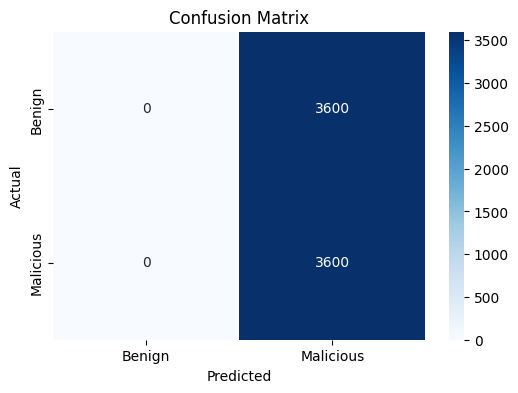


Execution Time: 25.23 seconds
Memory Used: 878.70 MB
CPU Times - User: 11.50s, System: 1.61s


In [1]:
import os
import time
import psutil
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from imblearn.under_sampling import RandomUnderSampler
import seaborn as sns
import matplotlib.pyplot as plt

# Start measuring time and resources
process = psutil.Process(os.getpid())
start_time = time.time()
start_memory = process.memory_info().rss / (1024 ** 2)  # Convert to MB
start_cpu_times = process.cpu_times()

# Load the dataset
df = pd.read_csv(r'C:\Users\arell\Documents\1_ALF\data\malicious_2021.csv', low_memory=False)

# Clean and encode the dataset
df_cleaned = df.copy()
df_cleaned['tld'] = df_cleaned['tld'].astype(str)
df_cleaned['url_type'] = df_cleaned['url_type'].astype(str)

# Remove NaNs and infinities from numeric columns only
numeric_features = [f for f in df_cleaned.columns if f not in ['tld', 'url_type']]
df_cleaned = df_cleaned[np.isfinite(df_cleaned[numeric_features]).all(axis=1)]

# Encode categorical columns
label_encoder_tld = LabelEncoder()
label_encoder_url_type = LabelEncoder()
df_cleaned['tld_encoded'] = label_encoder_tld.fit_transform(df_cleaned['tld'])
df_cleaned['url_type_encoded'] = label_encoder_url_type.fit_transform(df_cleaned['url_type'])

# Define features to use
selected_features = [
    'domain_token_count', 'path_token_count', 'avgdomaintokenlen',
    'longdomaintokenlen', 'ldl_domain', 'ldl_path', 'subDirLen',
    'pathurlRatio', 'argDomanRatio', 'domainUrlRatio', 'NumberofDotsinURL',
    'CharacterContinuityRate', 'host_DigitCount', 'host_letter_count',
    'Directory_LetterCount', 'Domain_LongestWordLength',
    'sub-Directory_LongestWordLength', 'URLQueries_variable',
    'delimeter_Domain', 'delimeter_Count', 'NumberRate_Domain',
    'SymbolCount_URL', 'SymbolCount_Domain', 'Entropy_Domain',
    'tld_encoded'
]

# Convert features to float32
X = df_cleaned[selected_features].astype(np.float32).values

# Encode binary labels (0 for benign, 1 for malicious)
df_cleaned['binary_label'] = df_cleaned['url_type_encoded'].apply(lambda x: 0 if x == 0 else 1)
y = df_cleaned['binary_label'].astype(np.int32).values

# Undersampling to balance the dataset
sampling_strategy = {0: 12000, 1: 12000}
under_sampler = RandomUnderSampler(sampling_strategy=sampling_strategy, random_state=42)
X_resampled, y_resampled = under_sampler.fit_resample(X, y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42, stratify=y_resampled)

# Build the model
model = Sequential([
    Dense(64, activation='relu', input_dim=X_train.shape[1]),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

# Evaluate the model
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Benign", "Malicious"], yticklabels=["Benign", "Malicious"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# End measuring time and resources
end_time = time.time()
end_memory = process.memory_info().rss / (1024 ** 2)  # Convert to MB
end_cpu_times = process.cpu_times()

# Print execution time and resource usage
print(f"\nExecution Time: {end_time - start_time:.2f} seconds")
print(f"Memory Used: {end_memory - start_memory:.2f} MB")
print(f"CPU Times - User: {end_cpu_times.user - start_cpu_times.user:.2f}s, "
      f"System: {end_cpu_times.system - start_cpu_times.system:.2f}s")


c:\Users\arell\.pyenv\pyenv-win\versions\3.11.9\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5033 - loss: 226.8893 - val_accuracy: 0.5086 - val_loss: 0.6929
Epoch 2/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4971 - loss: 9.9262 - val_accuracy: 0.5092 - val_loss: 0.6928
Epoch 3/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5013 - loss: 2.2404 - val_accuracy: 0.5092 - val_loss: 0.6927
Epoch 4/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4950 - loss: 1.3376 - val_accuracy: 0.5092 - val_loss: 0.6928
Epoch 5/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4900 - loss: 1.0501 - val_accuracy: 0.5092 - val_loss: 0.6927
Epoch 6/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4907 - loss: 1.0006 - val_accuracy: 0.5092 - val_loss: 0.6927
Epoch 7/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5110 - loss: 0.8505 - val_accuracy: 0.4914 - val_loss: 0.6928
Epoch 8/10
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5054 - loss: 0.7853 - val_accuracy: 

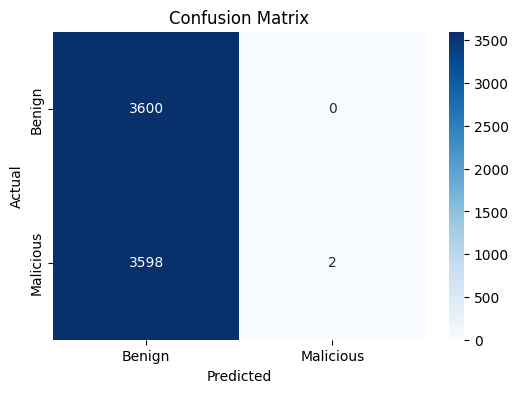


Execution Time: 22.14 seconds
Memory Used: -54.79 MB
CPU Times - User: 10.84s, System: 1.36s


In [2]:
import os
import time
import psutil
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from imblearn.under_sampling import RandomUnderSampler
import seaborn as sns
import matplotlib.pyplot as plt

# Start measuring time and resources
process = psutil.Process(os.getpid())
start_time = time.time()
start_memory = process.memory_info().rss / (1024 ** 2)  # Convert to MB
start_cpu_times = process.cpu_times()

# Load the dataset
df = pd.read_csv(r'C:\Users\arell\Documents\1_ALF\data\malicious_2021.csv', low_memory=False)

# Clean and encode the dataset
df_cleaned = df.copy()
df_cleaned['tld'] = df_cleaned['tld'].astype(str)
df_cleaned['url_type'] = df_cleaned['url_type'].astype(str)

# Remove NaNs and infinities from numeric columns only
numeric_features = [f for f in df_cleaned.columns if f not in ['tld', 'url_type']]
df_cleaned = df_cleaned[np.isfinite(df_cleaned[numeric_features]).all(axis=1)]

# Encode categorical columns
label_encoder_tld = LabelEncoder()
label_encoder_url_type = LabelEncoder()
df_cleaned['tld_encoded'] = label_encoder_tld.fit_transform(df_cleaned['tld'])
df_cleaned['url_type_encoded'] = label_encoder_url_type.fit_transform(df_cleaned['url_type'])

# Define features to use
selected_features = [
    'domain_token_count', 'path_token_count', 'avgdomaintokenlen',
    'longdomaintokenlen', 'ldl_domain', 'ldl_path', 'subDirLen',
    'pathurlRatio', 'argDomanRatio', 'domainUrlRatio', 'NumberofDotsinURL',
    'CharacterContinuityRate', 'host_DigitCount', 'host_letter_count',
    'Directory_LetterCount', 'Domain_LongestWordLength',
    'sub-Directory_LongestWordLength', 'URLQueries_variable',
    'delimeter_Domain', 'delimeter_Count', 'NumberRate_Domain',
    'SymbolCount_URL', 'SymbolCount_Domain', 'Entropy_Domain',
    'tld_encoded'
]

# Convert features to float32
X = df_cleaned[selected_features].astype(np.float32).values

# Encode binary labels (0 for benign, 1 for malicious)
df_cleaned['binary_label'] = df_cleaned['url_type_encoded'].apply(lambda x: 0 if x == 0 else 1)
y = df_cleaned['binary_label'].astype(np.int32).values

# Undersampling to balance the dataset
sampling_strategy = {0: 12000, 1: 12000}
under_sampler = RandomUnderSampler(sampling_strategy=sampling_strategy, random_state=42)
X_resampled, y_resampled = under_sampler.fit_resample(X, y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42, stratify=y_resampled)

# Build the model
model = Sequential([
    Dense(64, activation='relu', input_dim=X_train.shape[1]),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

# Evaluate the model
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Benign", "Malicious"], yticklabels=["Benign", "Malicious"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# End measuring time and resources
end_time = time.time()
end_memory = process.memory_info().rss / (1024 ** 2)  # Convert to MB
end_cpu_times = process.cpu_times()

# Print execution time and resource usage
print(f"\nExecution Time: {end_time - start_time:.2f} seconds")
print(f"Memory Used: {end_memory - start_memory:.2f} MB")
print(f"CPU Times - User: {end_cpu_times.user - start_cpu_times.user:.2f}s, "
      f"System: {end_cpu_times.system - start_cpu_times.system:.2f}s")


Epoch 1/50


c:\Users\arell\.pyenv\pyenv-win\versions\3.11.9\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


105/105 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7021 - loss: 1.3778 - val_accuracy: 0.8729 - val_loss: 0.9068
Epoch 2/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8501 - loss: 0.8881 - val_accuracy: 0.9057 - val_loss: 0.6889
Epoch 3/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8694 - loss: 0.6785 - val_accuracy: 0.9086 - val_loss: 0.5455
Epoch 4/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8872 - loss: 0.5390 - val_accuracy: 0.9247 - val_loss: 0.4349
Epoch 5/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8980 - loss: 0.4487 - val_accuracy: 0.9253 - val_loss: 0.3715
Epoch 6/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9045 - loss: 0.3833 - val_accuracy: 0.9298 - val_loss: 0.3153
Epoch 7/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9052 - loss: 0.3444 - val_accuracy: 0.9333 - val_loss: 0.2841
Epoch 8/50
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9104 - loss: 0.3111 - val_accuracy: 0.9336 - val_

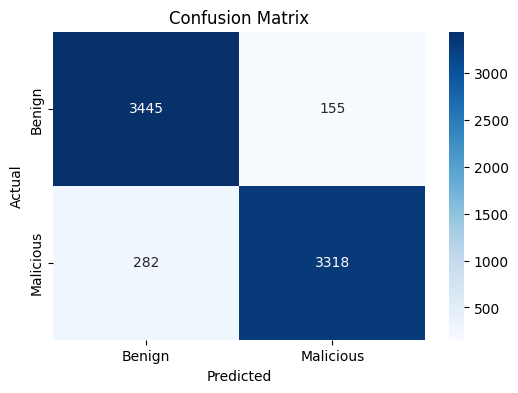


Execution Time: 14.25 seconds
Memory Used: 26.76 MB
CPU Times - User: 8.59s, System: 0.81s


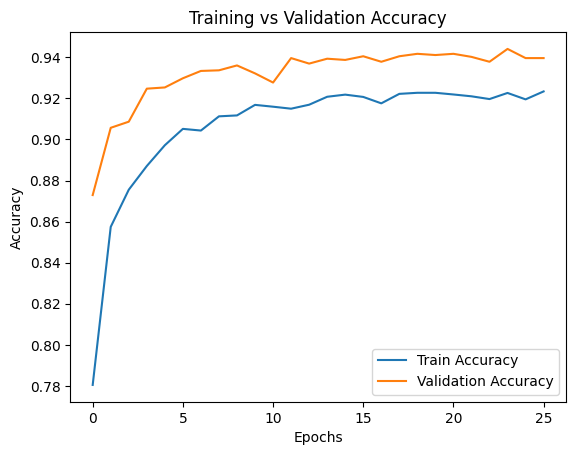

In [8]:
import os
import time
import psutil
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
from imblearn.under_sampling import RandomUnderSampler

# Start measuring time and resources
process = psutil.Process(os.getpid())
start_time = time.time()
start_memory = process.memory_info().rss / (1024 ** 2)  # Convert to MB
start_cpu_times = process.cpu_times()

# Load the dataset
file_path = r'C:\Users\arell\Documents\1_ALF\data\malicious_2021.csv'
df = pd.read_csv(file_path, low_memory=False)

# Validate dataset
required_columns = [
    'tld', 'url_type', 'domain_token_count', 'path_token_count', 'avgdomaintokenlen',
    'longdomaintokenlen', 'ldl_domain', 'ldl_path', 'subDirLen',
    'pathurlRatio', 'argDomanRatio', 'domainUrlRatio', 'NumberofDotsinURL',
    'CharacterContinuityRate', 'host_DigitCount', 'host_letter_count',
    'Directory_LetterCount', 'Domain_LongestWordLength',
    'sub-Directory_LongestWordLength', 'URLQueries_variable',
    'delimeter_Domain', 'delimeter_Count', 'NumberRate_Domain',
    'SymbolCount_URL', 'SymbolCount_Domain', 'Entropy_Domain'
]
missing_columns = [col for col in required_columns if col not in df.columns]
if missing_columns:
    raise ValueError(f"Missing required columns: {missing_columns}")

# Clean and encode the dataset
df_cleaned = df.copy()
df_cleaned['tld'] = df_cleaned['tld'].astype(str)
df_cleaned['url_type'] = df_cleaned['url_type'].astype(str)

# Remove NaNs and infinities from numeric columns
numeric_features = [f for f in df_cleaned.columns if f not in ['tld', 'url_type']]
df_cleaned = df_cleaned[np.isfinite(df_cleaned[numeric_features]).all(axis=1)]

# Encode categorical columns
label_encoder_tld = LabelEncoder()
label_encoder_url_type = LabelEncoder()
df_cleaned['tld_encoded'] = label_encoder_tld.fit_transform(df_cleaned['tld'])
df_cleaned['url_type_encoded'] = label_encoder_url_type.fit_transform(df_cleaned['url_type'])

# Define features to use
selected_features = [
    'domain_token_count', 'path_token_count', 'avgdomaintokenlen',
    'longdomaintokenlen', 'ldl_domain', 'ldl_path', 'subDirLen',
    'pathurlRatio', 'argDomanRatio', 'domainUrlRatio', 'NumberofDotsinURL',
    'CharacterContinuityRate', 'host_DigitCount', 'host_letter_count',
    'Directory_LetterCount', 'Domain_LongestWordLength',
    'sub-Directory_LongestWordLength', 'URLQueries_variable',
    'delimeter_Domain', 'delimeter_Count', 'NumberRate_Domain',
    'SymbolCount_URL', 'SymbolCount_Domain', 'Entropy_Domain',
    'tld_encoded'
]

# Convert features to float32
X = df_cleaned[selected_features].astype(np.float32).values

# Encode binary labels (0 for benign, 1 for malicious)
df_cleaned['binary_label'] = (df_cleaned['url_type_encoded'] != 0).astype(np.int32)
y = df_cleaned['binary_label'].values

# Undersampling to balance the dataset
sampling_strategy = {0: 12000, 1: 12000}
under_sampler = RandomUnderSampler(sampling_strategy=sampling_strategy, random_state=42)
X_resampled, y_resampled = under_sampler.fit_resample(X, y)

# Scale features
scaler = StandardScaler()
X_resampled = scaler.fit_transform(X_resampled)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42, stratify=y_resampled)

# Build the model
model = Sequential([
    Dense(64, activation='relu', kernel_regularizer=l2(0.01), input_dim=X_train.shape[1]),
    BatchNormalization(),
    Dropout(0.5),
    Dense(32, activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=128,
    validation_split=0.2,
    callbacks=[early_stopping]
)

# Evaluate the model
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Additional metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Precision: {precision:.2f}, Recall: {recall:.2f}, F1-Score: {f1:.2f}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Benign", "Malicious"], yticklabels=["Benign", "Malicious"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Save the model
model.save('malicious_url_classifier.h5')

# End measuring time and resources
end_time = time.time()
end_memory = process.memory_info().rss / (1024 ** 2)  # Convert to MB
end_cpu_times = process.cpu_times()

# Print execution time and resource usage
print(f"\nExecution Time: {end_time - start_time:.2f} seconds")
print(f"Memory Used: {end_memory - start_memory:.2f} MB")
print(f"CPU Times - User: {end_cpu_times.user - start_cpu_times.user:.2f}s, "
      f"System: {end_cpu_times.system - start_cpu_times.system:.2f}s")

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()


<h4>Fixed Model : used xgb for feature importance, then use cnn-lstm for prediction</h4>

c:\Users\arell\.pyenv\pyenv-win\versions\3.11.9\Lib\site-packages\xgboost\core.py:158: UserWarning: [00:18:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\arell\.pyenv\pyenv-win\versions\3.11.9\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
350/350 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7643 - loss: 1.1163 - val_accuracy: 0.9178 - val_loss: 0.4998
Epoch 2/50
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8972 - loss: 0.4714 - val_accuracy: 0.9324 - val_loss: 0.2911
Epoch 3/50
350/350 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9100 - loss: 0.3116 - val_accuracy: 0.9374 - val_loss: 0.2266
Epoch 4/50
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9149 - loss: 0.2640 - val_accuracy: 0.9379 - val_loss: 0.2059
Epoch 5/50
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9210 - loss: 0.2406 - val_accuracy: 0.9403 - val_loss: 0.1960
Epoch 6/50
350/350 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9211 - loss: 0.2372 - val_accuracy: 0.9422 - val_loss: 0.1914
Epoch 7/50
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9230 - loss: 0.2327 - val_accuracy: 0.9451 - val_loss: 0.1855
Epoch 8/50
350/350 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9246 - loss: 0.2272 - val_accuracy: 0.

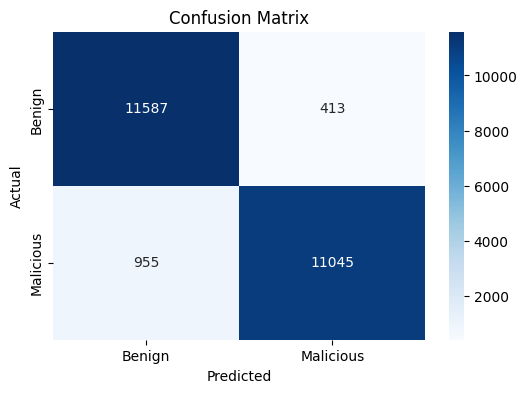

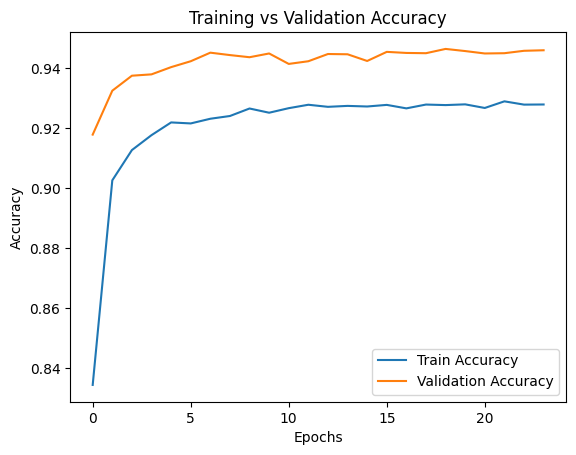

In [1]:
import os
import time
import psutil
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
from xgboost import XGBClassifier
from imblearn.under_sampling import RandomUnderSampler

# Start measuring time and resources
process = psutil.Process(os.getpid())
start_time = time.time()
start_memory = process.memory_info().rss / (1024 ** 2)  # Convert to MB
start_cpu_times = process.cpu_times()

# Load the dataset
file_path = r'C:\Users\arell\Documents\1_ALF\data\malicious_2021.csv'
df = pd.read_csv(file_path, low_memory=False)

# Validate dataset
required_columns = ['Querylength', 'domain_token_count', 'path_token_count', 'avgdomaintokenlen', 'longdomaintokenlen', 
            'avgpathtokenlen', 'tld', 'charcompvowels', 'charcompace', 'ldl_url', 'ldl_domain', 'ldl_path', 
            'ldl_filename', 'ldl_getArg', 'subDirLen', 'this.fileExtLen', 'ArgLen', 'pathurlRatio', 
            'ArgUrlRatio', 'argDomanRatio', 'domainUrlRatio', 'pathDomainRatio', 'argPathRatio', 'executable', 
            'isPortEighty', 'NumberofDotsinURL', 'ISIpAddressInDomainName', 'CharacterContinuityRate', 
            'LongestVariableValue', 'URL_DigitCount', 'host_DigitCount', 'Directory_DigitCount', 
            'File_name_DigitCount', 'Extension_DigitCount', 'Query_DigitCount', 'URL_Letter_Count', 
            'host_letter_count', 'Directory_LetterCount', 'Filename_LetterCount', 'Extension_LetterCount', 
            'Query_LetterCount', 'LongestPathTokenLength', 'Domain_LongestWordLength', 'Path_LongestWordLength', 
            'sub-Directory_LongestWordLength', 'Arguments_LongestWordLength', 'URL_sensitiveWord', 
            'URLQueries_variable', 'spcharUrl', 'delimeter_Domain', 'delimeter_path', 'delimeter_Count', 
            'NumberRate_URL', 'NumberRate_Domain', 'NumberRate_DirectoryName', 'NumberRate_FileName', 
            'NumberRate_Extension', 'NumberRate_AfterPath', 'SymbolCount_URL', 'SymbolCount_Domain', 
            'SymbolCount_Directoryname', 'SymbolCount_FileName', 'SymbolCount_Extension', 'SymbolCount_Afterpath', 
            'Entropy_URL', 'Entropy_Domain', 'Entropy_Filename', 'Entropy_Extension', 'Entropy_Afterpath']

missing_columns = [col for col in required_columns if col not in df.columns]
if missing_columns:
    raise ValueError(f"Missing required columns: {missing_columns}")

# Clean and encode the dataset
df_cleaned = df.copy()
df_cleaned['tld'] = df_cleaned['tld'].astype(str)
df_cleaned['url_type'] = df_cleaned['url_type'].astype(str)

# Remove NaNs and infinities from numeric columns
numeric_features = [f for f in df_cleaned.columns if f not in ['tld', 'url_type']]
df_cleaned = df_cleaned[np.isfinite(df_cleaned[numeric_features]).all(axis=1)]

# Encode categorical columns
label_encoder_tld = LabelEncoder()
label_encoder_url_type = LabelEncoder()
df_cleaned['tld_encoded'] = label_encoder_tld.fit_transform(df_cleaned['tld'])
df_cleaned['url_type_encoded'] = label_encoder_url_type.fit_transform(df_cleaned['url_type'])

# Encode binary labels (0 for benign, 1 for malicious)
df_cleaned['binary_label'] = (df_cleaned['url_type_encoded'] != 0).astype(np.int32)

# Define features and target
X = df_cleaned.drop(columns=['url_type', 'binary_label', 'url_type_encoded', 'tld']).astype(np.float32)
y = df_cleaned['binary_label'].values

# Feature selection using XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X, y)

# Get feature importances and select top 20 features
feature_importances = pd.DataFrame({
    'feature': X.columns,
    'importance': xgb_model.feature_importances_
}).sort_values(by='importance', ascending=False)

top_20_features = feature_importances['feature'][:20].tolist()
X_top = X[top_20_features]

# Undersampling to balance the dataset
sampling_strategy = {label: 40000 for label in np.unique(y)}
under_sampler = RandomUnderSampler(sampling_strategy=sampling_strategy, random_state=42)
X_resampled, y_resampled = under_sampler.fit_resample(X_top, y)

# Scale features
scaler = StandardScaler()
X_resampled = scaler.fit_transform(X_resampled)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42, stratify=y_resampled)

# Build the CNN-LSTM model
model = Sequential([
    Dense(64, activation='relu', kernel_regularizer=l2(0.01), input_dim=X_train.shape[1]),
    BatchNormalization(),
    Dropout(0.5),
    Dense(32, activation='relu', kernel_regularizer=l2(0.01)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=128,
    validation_split=0.2,
    callbacks=[early_stopping]
)

# Evaluate the model
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Additional metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Precision: {precision:.2f}, Recall: {recall:.2f}, F1-Score: {f1:.2f}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Benign", "Malicious"], yticklabels=["Benign", "Malicious"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Save the model
model.save('malicious_url_classifier.h5')

# End measuring time and resources
end_time = time.time()
end_memory = process.memory_info().rss / (1024 ** 2)  # Convert to MB
end_cpu_times = process.cpu_times()

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()


In [2]:
print(top_20_features)

['domainUrlRatio', 'host_DigitCount', 'subDirLen', 'pathurlRatio', 'domain_token_count', 'NumberofDotsinURL', 'CharacterContinuityRate', 'SymbolCount_Directoryname', 'NumberRate_Domain', 'ldl_path', 'pathDomainRatio', 'URL_sensitiveWord', 'ldl_domain', 'Entropy_Domain', 'spcharUrl', 'sub-Directory_LongestWordLength', 'ldl_url', 'argDomanRatio', 'ldl_filename', 'Filename_LetterCount']


In [3]:
# Print execution time and resource usage
print(f"\nExecution Time: {end_time - start_time:.2f} seconds")
print(f"Memory Used: {end_memory - start_memory:.2f} MB")
print(f"CPU Times - User: {end_cpu_times.user - start_cpu_times.user:.2f}s, "
      f"System: {end_cpu_times.system - start_cpu_times.system:.2f}s")


Execution Time: 25.15 seconds
Memory Used: 1066.56 MB
CPU Times - User: 39.78s, System: 11.17s
